In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test1_modified_2.csv')
df.head()

,datetime,type,gender,age
0,2019-12-01 00:00:00,regular,U,10s
1,2019-12-01 00:00:00,regular,U,10s
2,2019-12-01 00:00:00,regular,U,10s
3,2019-12-01 00:00:00,regular,U,10s
4,2019-12-01 00:00:00,regular,U,10s


In [3]:
df.shape

(45108029, 4)

### 정제된 데이터 활용

#### 데이터 그룹화
- datetime 기준으로 데이터 그룹화
- 특정 시간대의 이용자 수 확인

In [4]:
# 이용객 수 카운트에 사용할 count 컬럼 생성
# 모든 행에 1을 할당 -> sum 함수로 전체 데이터 수를 count
df['count'] = 1

# datetime 기준으로 데이터 그룹화
df.groupby('datetime').agg({'count':np.sum})

# 해당 시간대의 이용객 수

,count
datetime,
2017-01-01 00:00:00,77
2017-01-01 01:00:00,76
2017-01-01 02:00:00,57
2017-01-01 03:00:00,34
2017-01-01 04:00:00,23
...,...
2021-01-31 19:00:00,1890
2021-01-31 20:00:00,1894
2021-01-31 21:00:00,1836


In [5]:
# 고객 유형이 정기권인 데이터 추출
df.loc[df['type'] == 'regular']

,datetime,type,gender,age,count
0,2019-12-01 00:00:00,regular,U,10s,1
1,2019-12-01 00:00:00,regular,U,10s,1
2,2019-12-01 00:00:00,regular,U,10s,1
3,2019-12-01 00:00:00,regular,U,10s,1
4,2019-12-01 00:00:00,regular,U,10s,1
...,...,...,...,...,...
45107957,2018-11-30 23:00:00,regular,M,60s,1
45107958,2018-11-30 23:00:00,regular,M,60s,1
45107959,2018-11-30 23:00:00,regular,M,60s,1
45107960,2018-11-30 23:00:00,regular,M,60s,1


In [6]:
# 고객 유형이 정기권인 이용자들의 시간대별 이용량 확인

df['count'] = 1 # count 컬럼의 값을 1로 재설정

reg = df.loc[df['type'] == 'regular']
reg.groupby('datetime').agg({'count':np.sum})

# 이렇게 필요한 정보만 추출하여 핸들링하면 데이터의 용량 크게 감소해 분석 용이

,count
datetime,
2017-01-01 00:00:00,63
2017-01-01 01:00:00,55
2017-01-01 02:00:00,38
2017-01-01 03:00:00,22
2017-01-01 04:00:00,16
...,...
2021-01-31 19:00:00,1346
2021-01-31 20:00:00,1298
2021-01-31 21:00:00,1229


#### 고객 유형에 따른 시간대별 이용량
- 정기권
- 일일권
- 단체권

In [7]:
df['count'] = 1 # count 컬럼 값 재설정

reg = df.loc[df['type'] == 'regular']
reg = reg.groupby('datetime').agg({'count':np.sum}).reset_index()
reg.columns = ['datetime', 'regular']
reg

,datetime,regular
0,2017-01-01 00:00:00,63
1,2017-01-01 01:00:00,55
2,2017-01-01 02:00:00,38
3,2017-01-01 03:00:00,22
4,2017-01-01 04:00:00,16
...,...,...
35338,2021-01-31 19:00:00,1346
35339,2021-01-31 20:00:00,1298
35340,2021-01-31 21:00:00,1229
35341,2021-01-31 22:00:00,750


In [8]:
cas = df.loc[df['type'] == 'casual']
cas = cas.groupby('datetime').agg({'count':np.sum}).reset_index()
cas.columns = ['datetime', 'casual']
cas

,datetime,casual
0,2017-01-01 00:00:00,13
1,2017-01-01 01:00:00,21
2,2017-01-01 02:00:00,19
3,2017-01-01 03:00:00,12
4,2017-01-01 04:00:00,7
...,...,...
35043,2021-01-31 19:00:00,531
35044,2021-01-31 20:00:00,589
35045,2021-01-31 21:00:00,594
35046,2021-01-31 22:00:00,283


In [9]:
gro = df.loc[df['type'] == 'group']
gro = gro.groupby('datetime').agg({'count':np.sum}).reset_index()
gro.columns = ['datetime', 'group']
gro

,datetime,group
0,2017-01-01 00:00:00,1
1,2017-01-01 05:00:00,1
2,2017-01-01 12:00:00,2
3,2017-01-01 13:00:00,1
4,2017-01-01 14:00:00,1
...,...,...
23980,2021-01-31 19:00:00,13
23981,2021-01-31 20:00:00,7
23982,2021-01-31 21:00:00,13
23983,2021-01-31 22:00:00,10


In [10]:
print(reg.shape, cas.shape, gro.shape)

# 데이터 그룹으로 관리 -> 총 행의 개수가 확연히 줄어들어 관리가 용이

(35343, 2) (35048, 2) (23985, 2)


#### 고객 유형별 데이터 병합

In [15]:
# 행의 개수가 다르므로 merge 활용하여 데이터 병합
# 누락되는 데이터 없이 outer join

# inner join -> 모든 DataFrame에 존재하는 데이터(교집합)에 대하여 병합
# outer join -> 모든 데이터(합집합)에 대하여 병합(비는 값은 NaN 처리)

reg_cas = pd.merge(reg, cas, how='outer')
all_types = pd.merge(reg_cas, gro, how='outer')
all_types

# 고객 유형별(regular, casual, group) 데이터 생성 -> 레이블 및 분석 방향성 설정
# 시간에 따른 이용량 변화 및 고객 분류 기준

,datetime,regular,casual,group
0,2017-01-01 00:00:00,63.0,13.0,1.0
1,2017-01-01 01:00:00,55.0,21.0,NaN
2,2017-01-01 02:00:00,38.0,19.0,NaN
3,2017-01-01 03:00:00,22.0,12.0,NaN
4,2017-01-01 04:00:00,16.0,7.0,NaN
...,...,...,...,...
35346,2017-03-17 05:00:00,NaN,1.0,NaN
35347,2017-03-17 09:00:00,NaN,2.0,NaN
35348,2017-07-05 18:00:00,NaN,3.0,NaN
35349,2017-07-05 20:00:00,NaN,1.0,NaN


In [17]:
# 결측값 처리 -> 0으로 설정
all_types = all_types.fillna(0)
all_types

# 고객의 유형에 따른 시간대별 이용량 확인

,datetime,regular,casual,group
0,2017-01-01 00:00:00,63.0,13.0,1.0
1,2017-01-01 01:00:00,55.0,21.0,0.0
2,2017-01-01 02:00:00,38.0,19.0,0.0
3,2017-01-01 03:00:00,22.0,12.0,0.0
4,2017-01-01 04:00:00,16.0,7.0,0.0
...,...,...,...,...
35346,2017-03-17 05:00:00,0.0,1.0,0.0
35347,2017-03-17 09:00:00,0.0,2.0,0.0
35348,2017-07-05 18:00:00,0.0,3.0,0.0
35349,2017-07-05 20:00:00,0.0,1.0,0.0


In [18]:
all_types.to_csv('test1_modified_3.csv', index=False)

# 이전 파일들에 비해 용량이 크게 감소 -> 데이터 핸들링 용이

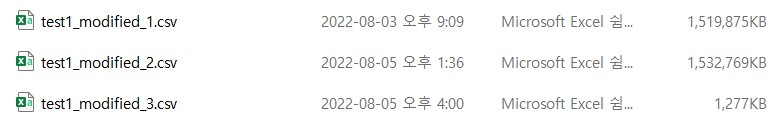

### Data Handling
- 공공자전거 이용량 변화에 영향을 줄 만한 정보를 추가로 가져와 사용
 - ex) 날씨, 요일 등등
 - 보유하고 있는 날짜 정보를 활용해 날씨 정보 수집 가능
- 필요한 정보를 고민하고 공유(communication)하는 것은 데이터 사이언티스트의 역량

#### 날씨 정보 수집
- 정보 제공 사이트: https://freemeteo.co.uk/
 - 날짜별 서울 날씨: https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date=2022-08-05&language=english&country=south-korea
- 필요한 정보를 찾아 웹 크롤링 작업 수행

In [22]:
# 날짜별 서울 날씨 URL을 세 부분으로 분할
start = 'https://freemeteo.co.uk/weather/seoul/history/daily-history/?gid=1835848&station=10565&date='
date = '2022-08-05'
end = '&language=english&country=south-korea'

In [23]:
tables = pd.read_html(start + date + end)
tables

# 특정 페이지 내 모든 테이블(dataframe) 형식의 데이터를 list 형태로 수집

[             Name           Weather forecast Altitiude  Population
 0           Seoul  Today | Tomorrow | 7 days       46m  10349312.0
 1             NaN  Today | Tomorrow | 7 days       12m         NaN
 2             NaN  Today | Tomorrow | 7 days       43m         NaN
 3             NaN  Today | Tomorrow | 7 days       13m         NaN
 4      Ahyon-dong  Today | Tomorrow | 7 days       27m         NaN
 5     Ahyoni-dong  Today | Tomorrow | 7 days       47m         NaN
 6    Ahyonil-tong  Today | Tomorrow | 7 days       65m         NaN
 7   Ahyonsam-dong  Today | Tomorrow | 7 days       47m         NaN
 8      Amsai-dong  Today | Tomorrow | 7 days        1m         NaN
 9     Amsail-tong  Today | Tomorrow | 7 days       18m         NaN
 10          Amsan  Today | Tomorrow | 7 days       27m         NaN
 11    Amsasa-dong  Today | Tomorrow | 7 days       26m         NaN
 12   Amsasam-dong  Today | Tomorrow | 7 days       23m         NaN
 13         An'gol  Today | Tomorrow | 7 days   

In [29]:
# 필요한 날씨 정보는 뒤에서 세 번째 요소(table)에 포함
tables[-3]

# 2017-01-01부터 모든 datetime에 대한 날씨 정보 크롤링 작업은 생략(weather 파일로 제공)

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails
0,00:00,26°C,28°C,310°4 Km/h,NaN,94%,25°C,1008.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C..."
1,01:00,26°C,28°C,250°6 Km/h,NaN,94%,25°C,1008.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
2,02:00,26°C,28°C,330°4 Km/h,NaN,94%,25°C,1008.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
3,03:00,26°C,28°C,40°6 Km/h,NaN,100%,26°C,1008.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
4,04:00,26°C,28°C,50°4 Km/h,NaN,100%,26°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
5,05:00,27°C,31°C,170°2 Km/h,NaN,89%,25°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
6,06:00,27°C,32°C,160°6 Km/h,NaN,94%,26°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
7,07:00,28°C,34°C,170°7 Km/h,NaN,89%,26°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
8,08:00,28°C,34°C,160°9 Km/h,NaN,89%,26°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."
9,09:00,28°C,34°C,180°9 Km/h,NaN,89%,26°C,1007.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C..."


#### 날씨 데이터 핸들링

In [4]:
from glob import glob

path = 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather'
glob(path + '/*.csv')[:30]

['C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-01.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-02.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-03.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-04.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-05.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-06.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-07.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-08.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-09.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-10.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-11.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-12.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-13.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-14.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-15.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-16.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-17.csv',
 'C:/김시원/2022/대학원/KG/8월 머신러닝/weather\\2017-01-18.csv',
 'C:/김시원/2

In [5]:
pd.read_csv(glob(path + '/*.csv')[0])

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date
0,00:00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
1,01:00,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
2,02:00,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
3,03:00,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
4,04:00,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
5,05:00,-4°C,-6°C,180°6 Km/h,NaN,80%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
6,06:00,-2°C,-4°C,210°6 Km/h,NaN,74%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
7,07:00,-1°C,-4°C,170°9 Km/h,NaN,80%,-4°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
8,08:00,-2°C,-2°C,170°4 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
9,09:00,1°C,-1°C,150°7 Km/h,NaN,81%,-2°C,1030.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01


In [6]:
# 크롤링한 모든 개별 날씨 정보 파일을 하나의 파일로 병합
weather = []

for path in glob(path + '/*.csv'):
    weather.append(pd.read_csv(path))

all_weather = pd.concat(weather)
all_weather.shape

(32513, 11)

In [39]:
all_weather

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date
0,00:00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
1,01:00,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
2,02:00,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
3,03:00,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
4,04:00,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...
19,19:00,6°C,5°C,150°6 Km/h,NaN,66%,0°C,1023.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C...",2021-01-31
20,20:00,6°C,4°C,150°7 Km/h,NaN,66%,0°C,1022.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C...",2021-01-31
21,21:00,6°C,4°C,130°9 Km/h,NaN,66%,0°C,1022.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C...",2021-01-31
22,22:00,6°C,4°C,160°9 Km/h,NaN,66%,0°C,1021.0mb,NaN,"document.write(Icons.GetShortDescription(3, 'C...",2021-01-31


### 고객 유형별 데이터(all_types)와 날씨 데이터(all_weather) 병합
- 두 데이터프레임의 merge를 위해서는 동일한 컬럼 필요
- all_weater 시간 정보(time, date)의 형태를 all_types 시간 정보(datetime)의 형태와 통일
 - 연-월-일 시:분:초

### all_weather 시간 정보 형태 변환
- date + Time

In [42]:
# 모든 데이터의 Time 컬럼이 5자리(시간:분)로 구성되어 있는지 확인
set(all_weather['Time'].apply(lambda x: len(x)))

{5}

In [46]:
# Time 데이터의 일관성 확인
print(all_weather['Time'].apply(lambda x: x[:2]).unique()) # 시
print()
print(all_weather['Time'].apply(lambda x: x[3:]).unique()) # 분

# 분 정보 일관성 x -> 어떤 데이터는 분 정보가 존재하지 않고(00), 어떤 데이터는 존재

# Time의 모든 분 정보를 00 처리해야 하는 이유
# 1) 날씨 정보는 분 단위로 수집하는 의미가 없음
# 2) all_types의 경우 분 정보가 존재하지 않으므로 통일 필요

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']

['00' '21' '49' '38' '36' '25' '31' '17' '54' '47' '57' '37' '46' '11'
 '33' '22' '04' '13' '51' '23' '30' '10' '27' '34' '43' '42' '50' '39'
 '41' '24' '16' '20' '35' '14' '45' '52' '32' '26' '18' '55' '44' '28'
 '29' '58' '05' '09' '12' '56' '48' '07' '15' '19' '59' '40' '53' '06'
 '08' '03']


In [7]:
# datetime 컬럼 추가(date + Time)
all_weather['Time'] = all_weather['Time'].apply(lambda x: x[:2]) # 분 정보 제외
all_weather['datetime'] = all_weather['date'] + ' ' + all_weather['Time'] + ':00:00'
all_weather.head()

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date,datetime
0,00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 00:00:00
1,01,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 01:00:00
2,02,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 02:00:00
3,03,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 03:00:00
4,04,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 04:00:00


### all_weather 온도 정보 형태 변환
- Temperature 관련 정보는 모두 온도 기호(°C) 포함
 - 문자열 형태
 - 분석이 용이하도록 특수 문자(°C)를 삭제하고 수치형 데이터로 변환
- 분석에 사용할 온도 정보
 - 외부 활동에 영향을 미칠 만한 정보
 - Temperature, Wind, Rel. humidity, Dew Point(이슬점: 불쾌지수를 나타내기 위해 사용)

In [59]:
temp_cols = ['Temperature', 'Wind', 'Rel. humidity', 'Dew Point']
all_weather[temp_cols]

,Temperature,Wind,Rel. humidity,Dew Point
0,-1°C,150°9 Km/h,75%,-5°C
1,-2°C,160°9 Km/h,80%,-5°C
2,-3°C,160°7 Km/h,74%,-7°C
3,-3°C,170°4 Km/h,80%,-6°C
4,-3°C,160°7 Km/h,80%,-6°C
...,...,...,...,...
19,6°C,150°6 Km/h,66%,0°C
20,6°C,150°7 Km/h,66%,0°C
21,6°C,130°9 Km/h,66%,0°C
22,6°C,160°9 Km/h,66%,0°C


#### Temperature, Dew Point

In [56]:
# 데이터 형태의 일관성 확인
print(set(all_weather['Temperature'].apply(lambda x: x[-2:])))
print(set(all_weather['Dew Point'].apply(lambda x: x[-2:])))

{'°C'}
{'°C'}


In [8]:
all_weather['temp'] = all_weather['Temperature'].apply(lambda x: int(x[:-2]))
all_weather['dew'] = all_weather['Dew Point'].apply(lambda x: int(x[:-2]))
all_weather.head()

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date,datetime,temp,dew
0,00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 00:00:00,-1,-5
1,01,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 01:00:00,-2,-5
2,02,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 02:00:00,-3,-7
3,03,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 03:00:00,-3,-6
4,04,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 04:00:00,-3,-6


#### Rel. humidity

In [60]:
# 데이터 형태의 일관성 확인
set(all_weather['Rel. humidity'].apply(lambda x: x[-1:]))

{'%'}

In [9]:
all_weather['humid'] = all_weather['Rel. humidity'].apply(lambda x: int(x[:-1]))
all_weather.head()

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date,datetime,temp,dew,humid
0,00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 00:00:00,-1,-5,75
1,01,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 01:00:00,-2,-5,80
2,02,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 02:00:00,-3,-7,74
3,03,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 03:00:00,-3,-6,80
4,04,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 04:00:00,-3,-6,80


#### Wind
- 풍향과 풍속을 모두 포함한 정보
 - 150°9 Km/h: 150° 방향으로 9km/h의 속도로 부는 바람
- 도메인 특성 상 사람이 인지할 수 있는 외부 활동에 영향을 미치는 정보는 풍향이 아닌 풍속
 - 사람들이 한 방향으로만 자전거를 운행한다면 풍향이 큰 의미를 가지겠지만, 사람들의 이동 방향은 천차만별
 - 따라서 풍속 정보만 추출하여 사용

In [10]:
# 풍속 정보를 추출하는 컨셉
wind_sample = '150°9 Km/h'
wind_sample.split('°')[1].split(' ')[0]

# 하지만 모든 데이터가 위의 조건을 만족한다고 가정해야 의미가 있음

'9'

In [13]:
# 데이터 형태의 일관성 확인
set(all_weather['Wind'].apply(lambda x: x[-5:]))

# 모든 데이터가 wind_sample의 형태로 존재하지 x
# Calm: 바람이 없는 고요한 상태(풍향과 풍속이 모두 측정되지 않은 경우)

{' Km/h', 'Calm'}

In [14]:
# 데이터를 일관성 있게 처리: Calm -> 000°0 Km/h
# datetime 기준으로 데이터를 조회하고 있으므로 drop하지 않고 형태를 변환
all_weather['Wind'] = all_weather['Wind'].apply(
    lambda x: x.replace('Calm', '000°0 Km/h'))

set(all_weather['Wind'].apply(lambda x: x[-5:]))

{' Km/h'}

In [15]:
# 풍속 정보를 추출하여 windspeed 컬럼 생성
all_weather['windspeed'] = all_weather['Wind'].apply(
    lambda x: int(x.split('°')[1].split(' ')[0]))
all_weather.head()

,Time,Temperature,Relative Temperature,Wind,Wind Gust,Rel. humidity,Dew Point,Pressure,Icon,DescriptionDetails,date,datetime,temp,dew,humid,windspeed
0,00,-1°C,-4°C,150°9 Km/h,NaN,75%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 00:00:00,-1,-5,75,9
1,01,-2°C,-5°C,160°9 Km/h,NaN,80%,-5°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 01:00:00,-2,-5,80,9
2,02,-3°C,-6°C,160°7 Km/h,NaN,74%,-7°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 02:00:00,-3,-7,74,7
3,03,-3°C,-3°C,170°4 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 03:00:00,-3,-6,80,4
4,04,-3°C,-6°C,160°7 Km/h,NaN,80%,-6°C,1029.0mb,NaN,"document.write(Icons.GetShortDescription(2, 'C...",2017-01-01,2017-01-01 04:00:00,-3,-6,80,7


#### 정제된 날씨 데이터 저장

In [16]:
features = ['datetime', 'temp', 'dew', 'humid', 'windspeed']
all_weather[features]

,datetime,temp,dew,humid,windspeed
0,2017-01-01 00:00:00,-1,-5,75,9
1,2017-01-01 01:00:00,-2,-5,80,9
2,2017-01-01 02:00:00,-3,-7,74,7
3,2017-01-01 03:00:00,-3,-6,80,4
4,2017-01-01 04:00:00,-3,-6,80,7
...,...,...,...,...,...
19,2021-01-31 19:00:00,6,0,66,6
20,2021-01-31 20:00:00,6,0,66,7
21,2021-01-31 21:00:00,6,0,66,9
22,2021-01-31 22:00:00,6,0,66,9


In [17]:
all_weather[features].to_csv('weather_modified.csv', index=False)

### 데이터 병합
- 고객 유형별 공공자전거 이용 데이터 + 날씨 데이터
 - datetime 컬럼을 기준으로 병합

In [3]:
all_types = pd.read_csv('test1_modified_3.csv')
weather = pd.read_csv('weather_modified.csv')

pd.merge(all_types, weather) # default: inner-join

# 고객 유형, 날씨 중 어느 하나라도 존재하지 않으면 의미가 없으므로 inner-join

,datetime,regular,casual,group,temp,dew,humid,windspeed
0,2017-01-01 00:00:00,63.0,13.0,1.0,-1,-5,75,9
1,2017-01-01 01:00:00,55.0,21.0,0.0,-2,-5,80,9
2,2017-01-01 02:00:00,38.0,19.0,0.0,-3,-7,74,7
3,2017-01-01 03:00:00,22.0,12.0,0.0,-3,-6,80,4
4,2017-01-01 04:00:00,16.0,7.0,0.0,-3,-6,80,7
...,...,...,...,...,...,...,...,...
32098,2017-03-17 05:00:00,0.0,1.0,0.0,-2,-5,80,4
32099,2017-03-17 09:00:00,0.0,2.0,0.0,6,0,66,2
32100,2017-07-05 18:00:00,0.0,3.0,0.0,30,20,55,13
32101,2017-07-05 20:00:00,0.0,1.0,0.0,27,20,66,7


In [4]:
# 체크 포인트: 병합된 데이터를 파일로 저장
# 데이터가 정렬되어 있지 않으므로 datetime 컬럼을 기준으로 오름차순 sort
pd.merge(all_types, weather).sort_values(by='datetime').to_csv('test1_modified_4.csv', index=False)